# Statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Gender

In [2]:
gender_pd = pd.read_json("data/gender_counts.json", lines=True)

In [3]:
gender_pd.sort_values(by=['count'], ascending=False).reset_index(drop=True).head()

,gender,count
0,['Q6581097'],1155085
1,['Q6581072'],229546
2,['Q1052281'],270
3,['Q2449503'],104
4,"['Q6581097', 'Q179294']",70


* Q6581097 --> Male
* Q6581072 --> Female
* Q1052281 --> Transgender female
* Q2449503 --> Transgender male

In [4]:
print("In total there are {} biographies".format(gender_pd['count'].sum()))

In total there are 1385232 biographies


In [5]:
dict_genders = {"Q6581097": "male", "Q6581072": "female"}

In [6]:
dict_genders.get("Q6581097", "other")

'male'

In [7]:
gender_pd['gender'] = gender_pd['gender'].map(lambda x: dict_genders.get(eval(x)[0], "other") if len(eval(x)) == 1 else "other")

In [8]:
gender_pd = gender_pd.groupby('gender').sum().reset_index()
gender_pd

,gender,count
0,female,229546
1,male,1155085
2,other,601


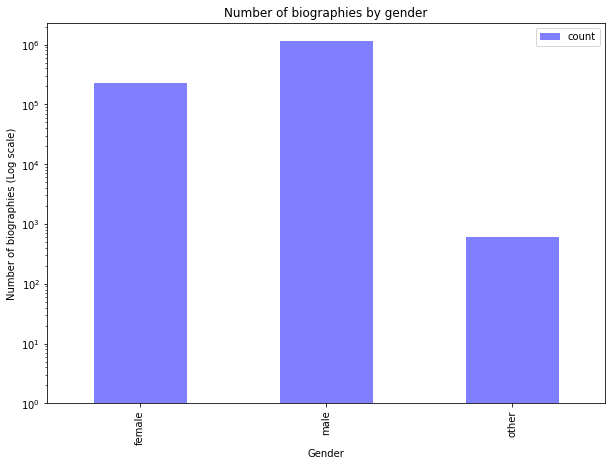

In [9]:
pl = gender_pd.plot(kind="bar", x="gender", y="count", figsize=(10, 7), log=True, alpha=0.5, color="blue")
pl.set_xlabel("Gender")
pl.set_ylabel("Number of biographies (Log scale)")
pl.set_title("Number of biographies by gender");

## Occupation

In [10]:
occ_pd = pd.read_json("data/occupation_counts.json", lines=True)

In [11]:
occ_pd.sort_values(by=['count'], ascending=False).reset_index(drop=True).head()

,occupation,count
0,Q82955,190814
1,Q937857,143774
2,Q33999,75201
3,Q36180,74377
4,Q1930187,40677


In [12]:
print("In total there are {} different occupations".format(len(occ_pd)))

In total there are 5899 different occupations


## We should group them